# Performing your own PCA

The goal is to load a new dataset on the type of absenteeism, and see what variables are good explanatory factors. To this purpose, we will calculate the principle components, see how much variance they capture, and what variables are important in each component.

## The dataset

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from pandas.plotting import scatter_matrix
import matplotlib.cm as cm
from random import randint

data = pd.read_csv('absent.csv', sep=';', index_col=0)
data.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


## Applying PCA

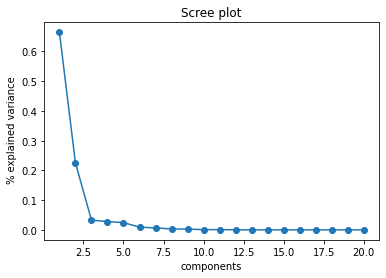

In [6]:
pca = PCA()
pca.fit(data)
plt.plot(range(1, len(pca.components_)+1), pca.explained_variance_ratio_, '-o')
plt.xlabel('components')
plt.ylabel(' % explained variance')
plt.title('Scree plot')
plt.show()

Now, find all principle components for which the explained variance is above a certain threshold. Store them as the array of weights that they are, not as an index. Also, return the explained variance of the component in a separate array.

In [8]:
def retain_explanatory_components(pca, threshold):
    components = []
    importance = []
    for c, x in zip(pca.components_, pca.explained_variance_ratio_):
        if x > threshold:
            components.append(c)
            importance.append(x)
    return components, importance

In [10]:
retain_explanatory_components(pca, 0.2)[1]

[0.6646304049437457, 0.22517768476979597]

In [23]:
abs(pca.components_[2])

array([0.18879739, 0.01643498, 0.0159329 , 0.00405304, 0.05143995,
       0.84515956, 0.04946256, 0.05992209, 0.03848584, 0.00140514,
       0.00124005, 0.00851175, 0.00643187, 0.00972686, 0.00125651,
       0.00860347, 0.06020544, 0.15549031, 0.03031665, 0.45863654])

## Finding important variables with PCA

Now, let's check what variables are important in the two components that were withheld at a threshold of 10% explained variance. To do this, write a function that withholds all the important variables as a list of column names:

In [17]:
def find_relevant_variable(component, threshold):
    variables = []
    weights = []
    #Loop the variables/columns of the data
    for index, variable in enumerate(data.columns):
        # Check whether the variables's absolute loading in the component exceeds the threshold
        if abs(component[index]) > threshold:
            
            #If so, store the variable and its loading
            variables.append(variable)
            weights.append(component[index])
    return variables, weights

In [24]:
find_relevant_variable(pca.components_[2], 0.1)

(['Reason for absence',
  'Distance from Residence to Work',
  'Height',
  'Absenteeism time in hours'],
 [-0.18879738863466794,
  -0.8451595574544247,
  0.1554903137836192,
  0.45863653707083646])

In [26]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components_columns = ['PC' +str(x) for x in range(1, len(pca.components_)+1)]
loadings_df = pd.DataFrame(loadings, columns=components_columns, index=data.columns)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Reason for absence,-1.000115,-1.106999,-2.831071,-0.462864,-0.563624,-7.675540,1.154338,0.061594,0.310033,0.042344,0.030942,-0.023431,0.004878,-0.004666,-0.009350,0.002272,0.000413,-0.000076,0.001393,0.002492
Month of absence,0.469833,-0.587289,0.246447,0.148515,-0.069125,0.352760,0.101791,-1.180182,2.413442,1.581225,-1.124995,-0.051120,-0.024161,-0.022858,0.181296,0.004830,0.002626,0.002222,-0.001103,0.000838
Day of the week,0.051475,0.018935,-0.238918,-0.160909,-0.032052,-0.073477,0.123099,0.142438,0.045124,0.066220,-0.055157,1.365680,0.063531,-0.102399,0.058202,-0.028137,0.007566,0.001840,-0.001226,-0.000524
Seasons,0.041111,0.167854,0.060777,-0.024791,-0.038938,0.110760,0.032416,-0.158367,0.224366,0.393179,-0.356061,0.070832,0.079578,0.008272,-0.904871,-0.005993,-0.006218,-0.005597,0.005477,-0.004982
Transportation expense,66.942934,-0.132659,0.771357,0.483711,-0.589010,-0.176801,0.099828,0.086054,-0.010159,-0.027689,-0.025914,-0.001498,-0.003801,-0.006626,-0.000651,-0.000546,0.000331,-0.000310,-0.000059,-0.000004
Distance from Residence to Work,4.067637,-1.247784,-12.673412,2.714230,5.668770,1.006654,-0.756832,0.481178,0.217851,0.135759,0.160549,-0.010940,-0.025484,-0.001574,-0.007134,0.009487,0.002262,-0.004777,0.000663,-0.000020
Service time,-1.546090,-0.017264,-0.741705,2.210195,0.071722,0.433936,2.129128,1.271303,0.295410,-1.267960,-1.819821,-0.049335,0.216678,-0.033898,0.031986,-0.011329,0.005657,0.001964,-0.005851,0.001832
Age,-1.519084,-0.254029,0.898549,2.978356,-0.691437,1.081798,4.626302,2.264563,0.653530,0.689474,0.914798,-0.029286,-0.057875,-0.033894,-0.015635,0.010075,-0.002113,-0.004989,-0.000093,-0.000320
Work load Average/day,0.294154,39.051449,-0.577106,0.250409,-0.001817,-0.160320,0.091823,-0.046872,-0.002763,0.043593,-0.012674,-0.002620,-0.002708,-0.000968,0.006778,0.001231,0.000055,0.000306,-0.000028,0.000071
Hit target,-0.303226,-0.335028,0.021070,-0.263002,0.192630,-0.445703,-0.357084,1.484150,-2.974373,1.338838,-0.892547,-0.036078,-0.031553,-0.004511,0.071113,-0.005076,-0.001280,0.003255,-0.000573,0.001074


In [29]:
components_columns = ['PC' +str(x) for x in range(1, len(pca.components_)+1)]
df = pd.DataFrame(pca.components_, columns=data.columns, index=components_columns)
df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
PC1,-0.014885,0.006993,0.000766,0.000612,0.996346,0.060541,-0.023011,-0.022609,0.004378,-0.004513,0.000363,-0.000552,0.006255,0.001074,0.000173,0.007896,-0.041665,-0.018065,-0.009168,0.005390
PC2,-0.028306,-0.015017,0.000484,0.004292,-0.003392,-0.031906,-0.000441,-0.006496,0.998550,-0.008567,0.000181,-0.001186,0.000737,-0.000532,0.000221,0.000102,-0.013782,0.017113,-0.010692,0.010371
PC3,-0.188797,0.016435,-0.015933,0.004053,0.051440,-0.845160,-0.049463,0.059922,-0.038486,0.001405,0.001240,0.008512,0.006432,-0.009727,0.001257,-0.008603,0.060205,0.155490,-0.030317,0.458637
PC4,-0.033696,0.010812,-0.011714,-0.001805,0.035213,0.197590,0.160898,0.216818,0.018229,-0.019146,0.001171,-0.018899,-0.001579,0.018636,-0.003208,-0.003189,0.869852,0.086074,0.274180,0.211597
PC5,-0.043639,-0.005352,-0.002482,-0.003015,-0.045605,0.438909,0.005553,-0.053535,-0.000141,0.014915,-0.003018,-0.003381,0.006616,0.005052,0.000031,0.002381,-0.265094,-0.047402,-0.075870,0.849610
PC6,-0.961146,0.044173,-0.009201,0.013870,-0.022139,0.126055,0.054338,0.135465,-0.020076,-0.055812,0.015741,0.000465,-0.000995,-0.000968,0.004093,0.003012,-0.070541,-0.098848,0.007824,-0.132982
PC7,0.172545,0.015215,0.018400,0.004845,0.014922,-0.113128,0.318253,0.691520,0.013725,-0.053375,-0.001113,-0.013043,0.019789,-0.004091,0.005955,-0.034124,-0.188381,-0.568142,0.114531,0.030366
PC8,0.012792,-0.245095,0.029581,-0.032889,0.017871,0.099929,0.264018,0.470294,-0.009734,0.308221,-0.001349,0.007112,0.041682,0.028496,0.012215,-0.035542,-0.149801,0.668010,-0.255005,-0.061699
PC9,0.073814,0.574605,0.010743,0.053418,-0.002419,0.051867,0.070333,0.155596,-0.000658,-0.708155,0.002773,-0.009029,0.023127,0.024930,0.001338,-0.024139,-0.073527,0.324450,-0.124026,-0.013719
PC10,0.016370,0.611290,0.025600,0.152000,-0.010704,0.052484,-0.490184,0.266546,0.016853,0.517585,-0.000078,-0.017881,0.020952,-0.012847,-0.001784,0.136441,0.016656,0.003067,0.007574,-0.005962


So, these functions should demonstrate what components, and what variables, are important in which components. Keep these things in mind and test some more on your own to get a good idea of what is happening. For example, we can clearly see that the second component is very much influenced by 'Distance from residence to work'. Nevertheless, the first two components are more important, and the variables influencing them are probably interesting to look at as well.